<h1 align=center><font size = 5>New Resturant in Singapore</font></h1>

# Introduction

With analysis on areas of Singapore, this report is going to see the area for new resturant open and the type of resturant suggestion. 

# Background

Singapore has a highly developed market economy, based historically on extended entrepôt trade. Along with Hong Kong, South Korea, and Taiwan, Singapore is one of the original Four Asian Tigers, but has surpassed its peers in terms of GDP per capita. Between 1965 and 1995, growth rates averaged around 6 per cent per annum, transforming the living standards of the population.

The Singaporean economy is known as one of the freest, most innovative, most competitive, most dynamic and most business-friendly. The 2015 Index of Economic Freedom ranks Singapore as the second freest economy in the world and the Ease of doing business index has also ranked Singapore as the easiest place to do business for the past decade. In 2016, Singapore is rated the world's most expensive city for the third consecutive year by the Economist Intelligence Unit. 

Recently, more and more investors are exploring the opportunities to set up business in Singapore. In this report, we are focusing on food and beverage type of business, especially the area and type of resturant selections. 

# Data and methodology

In this exercise, I will explore, segment, and cluster the areas in Singapore. For the Singapore area data, a Wikipedia page exists that has all the information I need to explore and cluster. The link is as following: https://en.wikipedia.org/wiki/Planning_Areas_of_Singapore. I am going to scrape the Wikipedia page and wrangle the data, clean it, and then read it into a pandas dataframe so that it is in a structured format. Of course, foursquare location data will be extracted to visualize Singapore areas and venues. Once the data is in a structured format, I am going to conduct the segmenting and clustering analysis to explore the areas in Singapore. k-means clustering algorithm is going to be used in this analysis. Furthermore, the Folium library is applied to visualize the areas.

## Step 1: imported libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup

print('Libraries imported.')

Libraries imported.


## Step 2: scrape Wikipedia page

In [2]:
source = requests.get('https://en.wikipedia.org/wiki/Planning_Areas_of_Singapore').text
soup = BeautifulSoup(source,'html.parser')
table = soup.find('table',{'class':'wikitable sortable'})
table_rows = table.find_all('tr')

## Step 3: Save the areas and region table into a DataFrame

In [3]:
data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])
    
df = pd.DataFrame(data,columns=['Area','Malay_Name','Chinese_Name','Pinyin','Tamil','Region','Size_KM2','Population','Density'])
df = df[~df['Area'].isnull()].reset_index()
areas_sg = df[['Area','Region','Size_KM2','Population','Density']]
areas_sg

,Area,Region,Size_KM2,Population,Density
0,Ang Mo Kio,North-East,13.94,"163,950","13,400"
1,Bedok,East,21.69,"279,380","13,000"
2,Bishan,Central,7.62,"88,010","12,000"
3,Boon Lay,West,8.23,30,3.6
4,Bukit Batok,West,11.13,"153,740","14,000"
5,Bukit Merah,Central,14.34,"151,980","11,000"
6,Bukit Panjang,West,8.99,"139,280","15,000"
7,Bukit Timah,Central,17.53,"77,430","4,400"
8,Central Water Catchment,North,37.15,*,*
9,Changi,East,40.61,"1,830",80.62


In [4]:
print('Singapore has {} areas in {} regions.'.format(
        len(areas_sg['Area'].unique()),
        len(areas_sg['Region'].unique())
    )
)

Singapore has 55 areas in 5 regions.


In [5]:
# Areas with no population

areas_sg_stat = areas_sg[~areas_sg.Population.str.contains('\*')].reset_index()
areas_sg_stat = areas_sg_stat[['Area','Region','Size_KM2','Population','Density']]
areas_sg_stat

,Area,Region,Size_KM2,Population,Density
0,Ang Mo Kio,North-East,13.94,"163,950","13,400"
1,Bedok,East,21.69,"279,380","13,000"
2,Bishan,Central,7.62,"88,010","12,000"
3,Boon Lay,West,8.23,30,3.6
4,Bukit Batok,West,11.13,"153,740","14,000"
5,Bukit Merah,Central,14.34,"151,980","11,000"
6,Bukit Panjang,West,8.99,"139,280","15,000"
7,Bukit Timah,Central,17.53,"77,430","4,400"
8,Changi,East,40.61,"1,830",80.62
9,Choa Chu Kang,West,6.11,"190,890","30,000"


In [6]:
# Plot areas of Singapore

areas_sg_stat['Size_KM2'] = areas_sg_stat['Size_KM2'].astype(float)
areas_sg_stat['Population'] = areas_sg_stat['Population'].str.replace(",", "").astype(float)
areas_sg_stat['Density'] = areas_sg_stat['Density'].str.replace(",", "").astype(float)
areas_sg_stat.to_csv('areas_sg.csv')
#print (areas_sg_stat.dtypes)

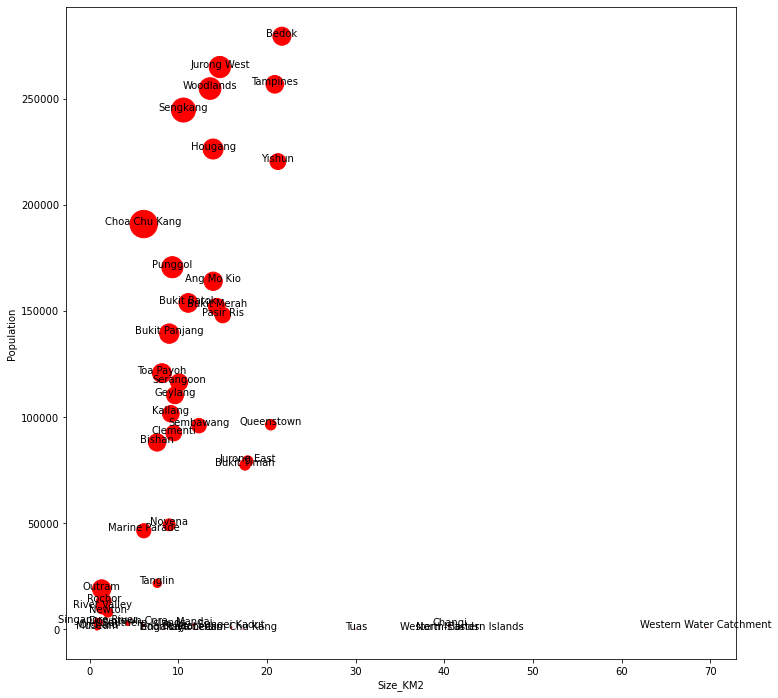

In [7]:
fig, ax = plt.subplots()

areas_sg_stat.plot.scatter(x='Size_KM2', 
                           y='Population', 
                           s=areas_sg_stat['Density']/40,
                           c = 'red',figsize=(12, 12),
                          ax = ax)

for i, txt in enumerate(areas_sg_stat['Area']):
    ax.annotate(txt, (areas_sg_stat['Size_KM2'][i],areas_sg_stat['Population'][i]),
               ha='center')
   
fig.canvas.draw()
plt.savefig('Bubble_chart.png',format ='png')

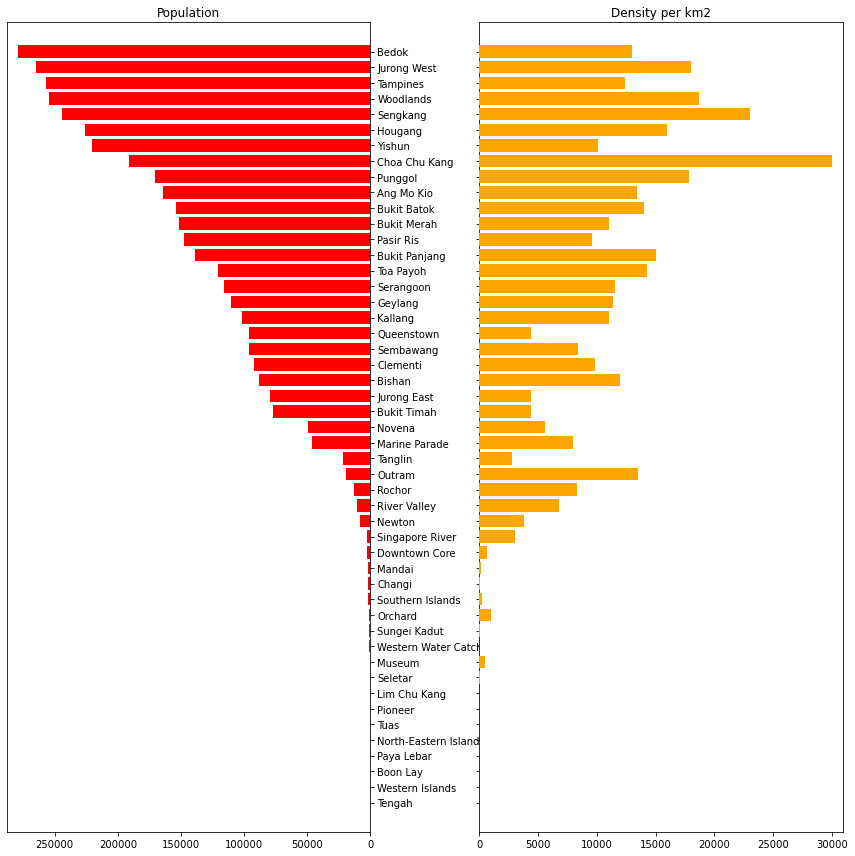

In [8]:
#Plot based on population

areas_sg_stat_sorted = areas_sg_stat.sort_values(['Population']).reset_index()

fig, axes = plt.subplots(ncols=2, sharey=True,figsize=(12,12))
axes[0].barh(areas_sg_stat_sorted['Area'], areas_sg_stat_sorted['Population'], align='center', color='red', zorder=10)
axes[0].set(title='Population')
axes[1].barh(areas_sg_stat_sorted['Area'], areas_sg_stat_sorted['Density'], align='center', color='orange', zorder=10)
axes[1].set(title='Density per km2')

axes[0].invert_xaxis()
axes[0].set(yticklabels=areas_sg_stat_sorted['Area'])
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)

fig.tight_layout()
fig.subplots_adjust(wspace=0.3)
fig.canvas.draw()
plt.savefig('popu_den.png',format='png')

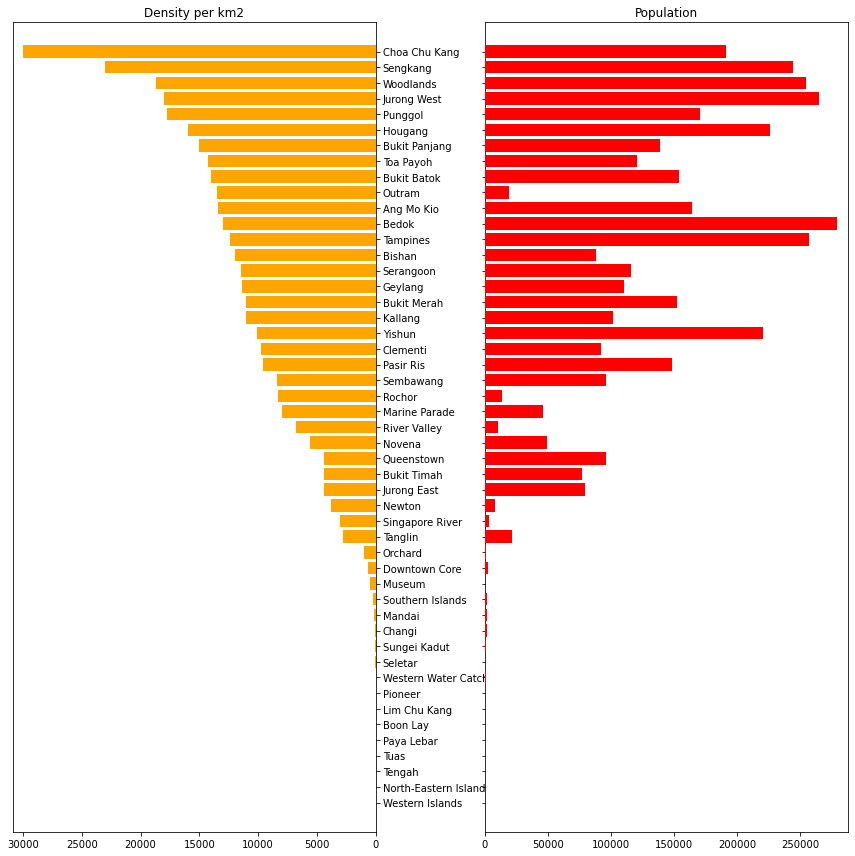

In [9]:
# Plot based on density

areas_sg_stat_sorted2 = areas_sg_stat.sort_values(['Density']).reset_index()

fig, axes = plt.subplots(ncols=2, sharey=True,figsize=(12,12))
axes[1].barh(areas_sg_stat_sorted2['Area'], areas_sg_stat_sorted2['Population'], align='center', color='red', zorder=10)
axes[1].set(title='Population')
axes[0].barh(areas_sg_stat_sorted2['Area'], areas_sg_stat_sorted2['Density'], align='center', color='orange', zorder=10)
axes[0].set(title='Density per km2')

axes[0].invert_xaxis()
axes[0].set(yticklabels=areas_sg_stat_sorted2['Area'])
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)

fig.tight_layout()
fig.subplots_adjust(wspace=0.3)
fig.canvas.draw()
plt.savefig('den_popu.png',format = 'png')


## Step 4: extract locations of Singapore and its areas

In [10]:
address = 'Singapore, Singapore'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore are 1.357107, 103.8194992.


In [11]:
column_names = ['Area','Latitude','Longitude']

areas_loc = pd.DataFrame(columns=column_names)

for ind in areas_sg.index:
    area = areas_sg['Area'][ind]
    address = area+', Singapore'
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    lat = location.latitude
    long = location.longitude
    areas_loc = areas_loc.append({'Area':area,
                                  'Latitude':lat,
                                  'Longitude':long},
                                 ignore_index=True)

areas_loc.head()

,Area,Latitude,Longitude
0,Ang Mo Kio,1.370073,103.849516
1,Bedok,1.323976,103.930216
2,Bishan,1.350986,103.848255
3,Boon Lay,1.338575,103.705848
4,Bukit Batok,1.349057,103.749591


In [12]:
df_sg = pd.merge(areas_sg,areas_loc,on='Area')
df_sg.head()

,Area,Region,Size_KM2,Population,Density,Latitude,Longitude
0,Ang Mo Kio,North-East,13.94,"163,950","13,400",1.370073,103.849516
1,Bedok,East,21.69,"279,380","13,000",1.323976,103.930216
2,Bishan,Central,7.62,"88,010","12,000",1.350986,103.848255
3,Boon Lay,West,8.23,30,3.6,1.338575,103.705848
4,Bukit Batok,West,11.13,"153,740","14,000",1.349057,103.749591


In [13]:
df_sg.shape

(55, 7)

## Step 5: Visualize the Singapore Areas map

In [14]:
# create map of Singapore using latitude and longitude values
map_singapore = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, area in zip(df_sg['Latitude'], df_sg['Longitude'], df_sg['Area']):
    label = '{}, {}'.format(df_sg, area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_singapore)  
    
map_singapore

## Step 6: Define Foursquare Credentials and Version

In [15]:
CLIENT_ID = 'H1PLCGQ4BBFRHD54KPBMBPXVPA0TKFLBGG2JFA1RL1NEXDL2' # your Foursquare ID
CLIENT_SECRET = 'EBHD1LTBSMHNF1HUOBD4T04SXGMLWI1RDIOGULKQWF0RN4OU' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: H1PLCGQ4BBFRHD54KPBMBPXVPA0TKFLBGG2JFA1RL1NEXDL2
CLIENT_SECRET:EBHD1LTBSMHNF1HUOBD4T04SXGMLWI1RDIOGULKQWF0RN4OU


## Step 7: Explore neighborhoods of Singapore

In [16]:
# Only select food venues

CategoryID = '4d4b7105d754a06374d81259'  # only food type

def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT = 150):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryID={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            CategoryID,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Area_Latitude', 
                  'Area_Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
singapore_venues = getNearbyVenues(names=df_sg['Area'],
                                   latitudes=df_sg['Latitude'],
                                   longitudes=df_sg['Longitude']
                                  )

Ang Mo Kio
Bedok
Bishan
Boon Lay
Bukit Batok
Bukit Merah
Bukit Panjang
Bukit Timah
Central Water Catchment
Changi
Changi Bay
Choa Chu Kang
Clementi
Downtown Core
Geylang
Hougang
Jurong East
Jurong West
Kallang
Lim Chu Kang
Mandai
Marina East
Marina South
Marine Parade
Museum
Newton
North-Eastern Islands
Novena
Orchard
Outram
Pasir Ris
Paya Lebar
Pioneer
Punggol
Queenstown
River Valley
Rochor
Seletar
Sembawang
Sengkang
Serangoon
Simpang
Singapore River
Southern Islands
Straits View
Sungei Kadut
Tampines
Tanglin
Tengah
Toa Payoh
Tuas
Western Islands
Western Water Catchment
Woodlands
Yishun


In [18]:
print(singapore_venues.shape)
singapore_venues.head()

(1731, 7)


,Area,Area_Latitude,Area_Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ang Mo Kio,1.370073,103.849516,FairPrice Xtra,1.369279,103.848886,Supermarket
1,Ang Mo Kio,1.370073,103.849516,Old Chang Kee,1.369094,103.848389,Snack Place
2,Ang Mo Kio,1.370073,103.849516,Face Ban Mian 非板面 (Ang Mo Kio),1.372031,103.847504,Noodle House
3,Ang Mo Kio,1.370073,103.849516,MOS Burger,1.369170,103.847831,Burger Joint
4,Ang Mo Kio,1.370073,103.849516,NTUC FairPrice,1.371507,103.847082,Supermarket


In [55]:
singapore_venues_count = singapore_venues.groupby('Area').count()
singapore_venues_count.to_csv('singapore_venues.csv')
print(singapore_venues_count)

                         Area_Latitude  Area_Longitude  Venue  Venue Latitude  \
Area                                                                            
Ang Mo Kio                          43              43     43              43   
Bedok                               60              60     60              60   
Bishan                              43              43     43              43   
Boon Lay                            78              78     78              78   
Bukit Batok                         23              23     23              23   
Bukit Merah                          5               5      5               5   
Bukit Panjang                       39              39     39              39   
Bukit Timah                         12              12     12              12   
Changi                               5               5      5               5   
Changi Bay                           6               6      6               6   
Choa Chu Kang               

In [20]:
print('There are {} uniques categories.'.format(len(singapore_venues['Venue Category'].unique())))

There are 226 uniques categories.


## Step 8: Analyze each area

In [21]:
# one hot encoding
singapore_onehot = pd.get_dummies(singapore_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
singapore_onehot['Area'] = singapore_venues['Area'] 

# move neighborhood column to the first column
fixed_columns = [singapore_onehot.columns[-1]] + list(singapore_onehot.columns[:-1])
singapore_onehot = singapore_onehot[fixed_columns]

singapore_onehot.head()

,Area,Accessories Store,Airport,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Bay,Beer Bar,Beer Garden,Beijing Restaurant,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Cantonese Restaurant,Casino,Cha Chaan Teng,Chinese Breakfast Place,Chinese Restaurant,Chocolate Shop,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Event Space,Exhibit,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flea Market,Food Court,Food Stand,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Hainan Restaurant,Halal Restaurant,Harbor / Marina,Health & Beauty Service,History Museum,Hobby Shop,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Light Rail Station,Lighthouse,Lottery Retailer,Lounge,Macanese Restaurant,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Mountain,Movie Theater,Multiplex,Museum,Music Venue,Nail Salon,Neighborhood,Night Market,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outlet Store,Paella Restaurant,Paper / Office Supplies Store,Park,Peking Duck Restaurant,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Pop-Up Shop,Portuguese Restaurant,Post Office,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rest Area,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shaanxi Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Taxi,Tea Room,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Travel Lounge,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Shop,Wings Joint,Yoga Studio,Zoo Exhibit
0,Ang Mo Kio,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Ang Mo Kio,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [22]:
singapore_onehot.shape

(1731, 227)

In [23]:
singapore_grouped = singapore_onehot.groupby('Area').mean().reset_index()
singapore_grouped.shape

(51, 227)

In [24]:
num_top_venues = 10

for hood in singapore_grouped['Area']:
    print("----"+hood+"----")
    temp = singapore_grouped[singapore_grouped['Area'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ang Mo Kio----
                  venue  freq
0           Coffee Shop  0.09
1          Dessert Shop  0.07
2            Food Court  0.07
3  Fast Food Restaurant  0.05
4       Bubble Tea Shop  0.05
5   Japanese Restaurant  0.05
6           Supermarket  0.05
7        Sandwich Place  0.05
8             Pool Hall  0.02
9      Department Store  0.02


----Bedok----
                 venue  freq
0          Coffee Shop  0.07
1       Sandwich Place  0.05
2  Japanese Restaurant  0.05
3           Food Court  0.05
4         Noodle House  0.05
5     Asian Restaurant  0.05
6   Chinese Restaurant  0.05
7          Supermarket  0.03
8                 Café  0.03
9     Sushi Restaurant  0.03


----Bishan----
                 venue  freq
0           Food Court  0.12
1          Coffee Shop  0.09
2      Bubble Tea Shop  0.07
3   Chinese Restaurant  0.07
4       Cosmetics Shop  0.07
5  Japanese Restaurant  0.05
6          Supermarket  0.05
7       Ice Cream Shop  0.05
8                 Café  0.05
9        

In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
area_venues_sorted = pd.DataFrame(columns=columns)
area_venues_sorted['Area'] = singapore_grouped['Area']

for ind in np.arange(singapore_grouped.shape[0]):
    area_venues_sorted.iloc[ind, 1:] = return_most_common_venues(singapore_grouped.iloc[ind, :], num_top_venues)

area_venues_sorted.head()

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ang Mo Kio,Coffee Shop,Dessert Shop,Food Court,Supermarket,Japanese Restaurant,Sandwich Place,Fast Food Restaurant,Bubble Tea Shop,Snack Place,Gym / Fitness Center
1,Bedok,Coffee Shop,Chinese Restaurant,Food Court,Sandwich Place,Japanese Restaurant,Asian Restaurant,Noodle House,Supermarket,Café,Sushi Restaurant
2,Bishan,Food Court,Coffee Shop,Chinese Restaurant,Cosmetics Shop,Bubble Tea Shop,Supermarket,Japanese Restaurant,Ice Cream Shop,Café,Shaanxi Restaurant
3,Boon Lay,Japanese Restaurant,Asian Restaurant,Fast Food Restaurant,Chinese Restaurant,Dessert Shop,Café,Coffee Shop,Indian Restaurant,Boutique,Playground
4,Bukit Batok,Coffee Shop,Chinese Restaurant,Food Court,Department Store,Bowling Alley,Sandwich Place,Fast Food Restaurant,Track,Malay Restaurant,Multiplex


## Step 9: Clustering of Areas

In [27]:
# set number of clusters
kclusters = 10

singapore_grouped_clustering = singapore_grouped.drop('Area', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(singapore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 3, 0, 0])

In [28]:
# add clustering labels
area_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sg_merged = df_sg

# merge singapore_grouped with df_sg to add latitude/longitude for each neighborhood
sg_merged = sg_merged.join(area_venues_sorted.set_index('Area'), on='Area')

sg_merged = sg_merged.dropna()

sg_merged.shape

(51, 18)

In [29]:
sg_merged.head() # check the last columns!

,Area,Region,Size_KM2,Population,Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ang Mo Kio,North-East,13.94,"163,950","13,400",1.370073,103.849516,0.0,Coffee Shop,Dessert Shop,Food Court,Supermarket,Japanese Restaurant,Sandwich Place,Fast Food Restaurant,Bubble Tea Shop,Snack Place,Gym / Fitness Center
1,Bedok,East,21.69,"279,380","13,000",1.323976,103.930216,0.0,Coffee Shop,Chinese Restaurant,Food Court,Sandwich Place,Japanese Restaurant,Asian Restaurant,Noodle House,Supermarket,Café,Sushi Restaurant
2,Bishan,Central,7.62,"88,010","12,000",1.350986,103.848255,0.0,Food Court,Coffee Shop,Chinese Restaurant,Cosmetics Shop,Bubble Tea Shop,Supermarket,Japanese Restaurant,Ice Cream Shop,Café,Shaanxi Restaurant
3,Boon Lay,West,8.23,30,3.6,1.338575,103.705848,0.0,Japanese Restaurant,Asian Restaurant,Fast Food Restaurant,Chinese Restaurant,Dessert Shop,Café,Coffee Shop,Indian Restaurant,Boutique,Playground
4,Bukit Batok,West,11.13,"153,740","14,000",1.349057,103.749591,0.0,Coffee Shop,Chinese Restaurant,Food Court,Department Store,Bowling Alley,Sandwich Place,Fast Food Restaurant,Track,Malay Restaurant,Multiplex


In [30]:
sg_merged

,Area,Region,Size_KM2,Population,Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ang Mo Kio,North-East,13.94,"163,950","13,400",1.370073,103.849516,0.0,Coffee Shop,Dessert Shop,Food Court,Supermarket,Japanese Restaurant,Sandwich Place,Fast Food Restaurant,Bubble Tea Shop,Snack Place,Gym / Fitness Center
1,Bedok,East,21.69,"279,380","13,000",1.323976,103.930216,0.0,Coffee Shop,Chinese Restaurant,Food Court,Sandwich Place,Japanese Restaurant,Asian Restaurant,Noodle House,Supermarket,Café,Sushi Restaurant
2,Bishan,Central,7.62,"88,010","12,000",1.350986,103.848255,0.0,Food Court,Coffee Shop,Chinese Restaurant,Cosmetics Shop,Bubble Tea Shop,Supermarket,Japanese Restaurant,Ice Cream Shop,Café,Shaanxi Restaurant
3,Boon Lay,West,8.23,30,3.6,1.338575,103.705848,0.0,Japanese Restaurant,Asian Restaurant,Fast Food Restaurant,Chinese Restaurant,Dessert Shop,Café,Coffee Shop,Indian Restaurant,Boutique,Playground
4,Bukit Batok,West,11.13,"153,740","14,000",1.349057,103.749591,0.0,Coffee Shop,Chinese Restaurant,Food Court,Department Store,Bowling Alley,Sandwich Place,Fast Food Restaurant,Track,Malay Restaurant,Multiplex
5,Bukit Merah,Central,14.34,"151,980","11,000",1.270439,103.828318,0.0,Juice Bar,Cafeteria,Playground,Harbor / Marina,Park,Zoo Exhibit,Flea Market,Gaming Cafe,Furniture / Home Store,Fruit & Vegetable Store
6,Bukit Panjang,West,8.99,"139,280","15,000",1.378629,103.762136,0.0,Fast Food Restaurant,Coffee Shop,Café,Asian Restaurant,Sushi Restaurant,Shopping Mall,Bakery,Noodle House,Japanese Restaurant,Boutique
7,Bukit Timah,Central,17.53,"77,430","4,400",1.354690,103.776372,3.0,Trail,Rest Area,Mountain,Scenic Lookout,Zoo Exhibit,Filipino Restaurant,Gaming Cafe,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop
9,Changi,East,40.61,"1,830",80.62,1.351080,103.990064,0.0,Airport,Rest Area,Food Court,Hotel,Zoo Exhibit,Filipino Restaurant,Garden,Gaming Cafe,Furniture / Home Store,Fruit & Vegetable Store
10,Changi Bay,East,1.7,*,*,1.316850,104.020649,0.0,Boat or Ferry,Smoke Shop,Gym Pool,Pizza Place,History Museum,Zoo Exhibit,Flea Market,Gaming Cafe,Furniture / Home Store,Fruit & Vegetable Store


In [31]:
sg_merged = sg_merged.astype({'Cluster Labels':int})

sg_merged

,Area,Region,Size_KM2,Population,Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ang Mo Kio,North-East,13.94,"163,950","13,400",1.370073,103.849516,0,Coffee Shop,Dessert Shop,Food Court,Supermarket,Japanese Restaurant,Sandwich Place,Fast Food Restaurant,Bubble Tea Shop,Snack Place,Gym / Fitness Center
1,Bedok,East,21.69,"279,380","13,000",1.323976,103.930216,0,Coffee Shop,Chinese Restaurant,Food Court,Sandwich Place,Japanese Restaurant,Asian Restaurant,Noodle House,Supermarket,Café,Sushi Restaurant
2,Bishan,Central,7.62,"88,010","12,000",1.350986,103.848255,0,Food Court,Coffee Shop,Chinese Restaurant,Cosmetics Shop,Bubble Tea Shop,Supermarket,Japanese Restaurant,Ice Cream Shop,Café,Shaanxi Restaurant
3,Boon Lay,West,8.23,30,3.6,1.338575,103.705848,0,Japanese Restaurant,Asian Restaurant,Fast Food Restaurant,Chinese Restaurant,Dessert Shop,Café,Coffee Shop,Indian Restaurant,Boutique,Playground
4,Bukit Batok,West,11.13,"153,740","14,000",1.349057,103.749591,0,Coffee Shop,Chinese Restaurant,Food Court,Department Store,Bowling Alley,Sandwich Place,Fast Food Restaurant,Track,Malay Restaurant,Multiplex
5,Bukit Merah,Central,14.34,"151,980","11,000",1.270439,103.828318,0,Juice Bar,Cafeteria,Playground,Harbor / Marina,Park,Zoo Exhibit,Flea Market,Gaming Cafe,Furniture / Home Store,Fruit & Vegetable Store
6,Bukit Panjang,West,8.99,"139,280","15,000",1.378629,103.762136,0,Fast Food Restaurant,Coffee Shop,Café,Asian Restaurant,Sushi Restaurant,Shopping Mall,Bakery,Noodle House,Japanese Restaurant,Boutique
7,Bukit Timah,Central,17.53,"77,430","4,400",1.354690,103.776372,3,Trail,Rest Area,Mountain,Scenic Lookout,Zoo Exhibit,Filipino Restaurant,Gaming Cafe,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop
9,Changi,East,40.61,"1,830",80.62,1.351080,103.990064,0,Airport,Rest Area,Food Court,Hotel,Zoo Exhibit,Filipino Restaurant,Garden,Gaming Cafe,Furniture / Home Store,Fruit & Vegetable Store
10,Changi Bay,East,1.7,*,*,1.316850,104.020649,0,Boat or Ferry,Smoke Shop,Gym Pool,Pizza Place,History Museum,Zoo Exhibit,Flea Market,Gaming Cafe,Furniture / Home Store,Fruit & Vegetable Store


In [32]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sg_merged['Latitude'], sg_merged['Longitude'], sg_merged['Area'], sg_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Step 10: Look into each cluster

### Cluster 1

In [33]:
sg_merged_01 = sg_merged.loc[sg_merged['Cluster Labels'] == 0]
sg_merged_01

,Area,Region,Size_KM2,Population,Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ang Mo Kio,North-East,13.94,"163,950","13,400",1.370073,103.849516,0,Coffee Shop,Dessert Shop,Food Court,Supermarket,Japanese Restaurant,Sandwich Place,Fast Food Restaurant,Bubble Tea Shop,Snack Place,Gym / Fitness Center
1,Bedok,East,21.69,"279,380","13,000",1.323976,103.930216,0,Coffee Shop,Chinese Restaurant,Food Court,Sandwich Place,Japanese Restaurant,Asian Restaurant,Noodle House,Supermarket,Café,Sushi Restaurant
2,Bishan,Central,7.62,"88,010","12,000",1.350986,103.848255,0,Food Court,Coffee Shop,Chinese Restaurant,Cosmetics Shop,Bubble Tea Shop,Supermarket,Japanese Restaurant,Ice Cream Shop,Café,Shaanxi Restaurant
3,Boon Lay,West,8.23,30,3.6,1.338575,103.705848,0,Japanese Restaurant,Asian Restaurant,Fast Food Restaurant,Chinese Restaurant,Dessert Shop,Café,Coffee Shop,Indian Restaurant,Boutique,Playground
4,Bukit Batok,West,11.13,"153,740","14,000",1.349057,103.749591,0,Coffee Shop,Chinese Restaurant,Food Court,Department Store,Bowling Alley,Sandwich Place,Fast Food Restaurant,Track,Malay Restaurant,Multiplex
5,Bukit Merah,Central,14.34,"151,980","11,000",1.270439,103.828318,0,Juice Bar,Cafeteria,Playground,Harbor / Marina,Park,Zoo Exhibit,Flea Market,Gaming Cafe,Furniture / Home Store,Fruit & Vegetable Store
6,Bukit Panjang,West,8.99,"139,280","15,000",1.378629,103.762136,0,Fast Food Restaurant,Coffee Shop,Café,Asian Restaurant,Sushi Restaurant,Shopping Mall,Bakery,Noodle House,Japanese Restaurant,Boutique
9,Changi,East,40.61,"1,830",80.62,1.351080,103.990064,0,Airport,Rest Area,Food Court,Hotel,Zoo Exhibit,Filipino Restaurant,Garden,Gaming Cafe,Furniture / Home Store,Fruit & Vegetable Store
10,Changi Bay,East,1.7,*,*,1.316850,104.020649,0,Boat or Ferry,Smoke Shop,Gym Pool,Pizza Place,History Museum,Zoo Exhibit,Flea Market,Gaming Cafe,Furniture / Home Store,Fruit & Vegetable Store
11,Choa Chu Kang,West,6.11,"190,890","30,000",1.384749,103.744534,0,Asian Restaurant,Fast Food Restaurant,Coffee Shop,Bubble Tea Shop,Bakery,Furniture / Home Store,Portuguese Restaurant,Café,Shop & Service,Supermarket


In [34]:
sg_merged_01.shape

(42, 18)

### Cluster 2

In [35]:
sg_merged_02 = sg_merged.loc[sg_merged['Cluster Labels'] == 1]
sg_merged_02

,Area,Region,Size_KM2,Population,Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
52,Western Water Catchment,West,69.46,720,13,1.366452,103.681031,1,Gun Range,Zoo Exhibit,German Restaurant,Gastropub,Garden,Gaming Cafe,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint


In [36]:
sg_merged_02.shape

(1, 18)

### Cluster 3

In [37]:
sg_merged_03 = sg_merged.loc[sg_merged['Cluster Labels'] == 2]
sg_merged_03

,Area,Region,Size_KM2,Population,Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
44,Straits View,Central,0.77,*,*,1.255708,103.862228,2,Boat or Ferry,Zoo Exhibit,Flea Market,General Entertainment,Gastropub,Garden,Gaming Cafe,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop


In [38]:
sg_merged_03.shape

(1, 18)

### Cluster 4

In [39]:
sg_merged_04 = sg_merged.loc[sg_merged['Cluster Labels'] == 3]
sg_merged_04

,Area,Region,Size_KM2,Population,Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Bukit Timah,Central,17.53,"77,430","4,400",1.35469,103.776372,3,Trail,Rest Area,Mountain,Scenic Lookout,Zoo Exhibit,Filipino Restaurant,Gaming Cafe,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop


In [40]:
sg_merged_04.shape

(1, 18)

### Cluster 5

In [41]:
sg_merged_05 = sg_merged.loc[sg_merged['Cluster Labels'] == 4]
sg_merged_05

,Area,Region,Size_KM2,Population,Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,Mandai,North,11.77,"2,090",180.2,1.423535,103.80335,4,Asian Restaurant,Zoo Exhibit,Fish & Chips Shop,General Entertainment,Gastropub,Garden,Gaming Cafe,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop


In [42]:
sg_merged_05.shape

(1, 18)

### Cluster 6

In [43]:
sg_merged_06 = sg_merged.loc[sg_merged['Cluster Labels'] == 5]
sg_merged_06

,Area,Region,Size_KM2,Population,Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
50,Tuas,West,30.04,70,2.3,1.329372,103.648236,5,Outdoor Supply Store,Coffee Shop,Zoo Exhibit,Fish & Chips Shop,Garden,Gaming Cafe,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint


In [44]:
sg_merged_06.shape

(1, 18)

### Cluster 7

In [45]:
sg_merged_07 = sg_merged.loc[sg_merged['Cluster Labels'] == 6]
sg_merged_07

,Area,Region,Size_KM2,Population,Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Marina East,Central,1.82,*,*,1.288624,103.869827,6,Park,Lake,Café,Zoo Exhibit,Flea Market,Gastropub,Garden,Gaming Cafe,Furniture / Home Store,Fruit & Vegetable Store


In [46]:
sg_merged_07.shape

(1, 18)

### Cluster 8

In [47]:
sg_merged_08 = sg_merged.loc[sg_merged['Cluster Labels'] == 7]
sg_merged_08

,Area,Region,Size_KM2,Population,Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
41,Simpang,North,5.13,*,*,1.445295,103.849743,7,Platform,Zoo Exhibit,Fish & Chips Shop,Gastropub,Garden,Gaming Cafe,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint


In [48]:
sg_merged_08.shape

(1, 18)

### Cluster 9

In [49]:
sg_merged_09 = sg_merged.loc[sg_merged['Cluster Labels'] == 8]
sg_merged_09

,Area,Region,Size_KM2,Population,Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
45,Sungei Kadut,North,15.99,780,53.2,1.414997,103.753311,8,Office,Art Gallery,Bus Station,Flea Market,General Entertainment,Gastropub,Garden,Gaming Cafe,Furniture / Home Store,Fruit & Vegetable Store


In [50]:
sg_merged_09.shape

(1, 18)

### Cluster 10

In [51]:
sg_merged_10 = sg_merged.loc[sg_merged['Cluster Labels'] == 9]
sg_merged_10

,Area,Region,Size_KM2,Population,Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,Western Islands,West,39.47,10,0.25,1.250883,103.687883,9,Harbor / Marina,Arts & Crafts Store,Boat or Ferry,Zoo Exhibit,Food Court,General Entertainment,Gastropub,Garden,Gaming Cafe,Furniture / Home Store


In [52]:
sg_merged_10.shape

(1, 18)